In [2]:
import os
import time
import yaml
import pickle
import numpy as np
import subprocess
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import sys
from pathlib import Path
import json
import datetime
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
import multiprocessing
project_dir = Path().resolve().parents[1]
sys.path.insert(0, project_dir)
home = os.path.expanduser("~") 
os.chdir(str(project_dir))
import matplotlib.ticker as ticker
from scipy.stats import linregress
import experiment.toolkits.figure_formatting.formatter_2023_az as fmt
import experiment.toolkits.figure_formatting.production_quality_plots as prod_plot
from tools.benchmarks.helpers import *
import math
from matplotlib.ticker import FormatStrFormatter

In [3]:
executable_path = str(project_dir) + "/bin/modules/operational-benchmarking/op-bench-loss"
def get_loss_prob (algorithm, ntx, nty, num_target, loading_efficiency = 0.6, alpha = 0.985, nu = 0.985, lifetime = 60, num_trials = 1, num_reps = 1000, batched = 1, relative = 1):
    command =  f"{executable_path} {algorithm} {ntx} {nty} {num_target} {loading_efficiency} {alpha} {nu} {lifetime} {num_trials} {num_reps} {batched} {relative}"
    return os.popen(command).read()

# Load Data

In [3]:
file_name_batched = "july_18_rel_batched_1721355825.8340032.pkl"
file_name_non_batched = "july_18_rel_non_batched_1721355825.8340526.pkl"

with open(os.path.join(home, "LLRS", "resources", "operational-benchmarking", file_name_batched), "rb") as file:
    data_batched = pickle.load(file)


with open(os.path.join(home, "LLRS", "resources", "operational-benchmarking", file_name_non_batched), "rb") as file:
    data_non_batched = pickle.load(file)

Production quality plot saved to /home/tqtraaqs1/LLRS/atom-loss.pdf


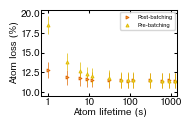

In [4]:
fig, ax = plt.subplots() 
ax.set_ylabel("Atom loss (%)")
ax.set_xlabel("Atom lifetime (s)")
xvals = [math.log(x,10) for x in [1,3,6,9,12,30,60,90,120,300,600, 900, 1200]]

prod_plot.production_quality_scatter(fig, ax, [xvals, xvals], [[x[0]*100 for x in data_batched], [x[0]*100 for x in data_non_batched]],y_decimal=2 ,yerr_list=[[x[1]*100 for x in data_batched], [x[1]*100 for x in data_non_batched]], markers=mark(["rrcbatch", "rrccpu"]),palette=pal(["rrcbatch", "rrccpu"]), save_path=str(project_dir) + "/atom-loss.pdf")



ax.legend(["Post-batching", "Pre-batching"] ,fontsize=4)
def xticks(ax, lst):
    ax.set_xticks(lst, [10**x for x in lst], fontsize=7)
    diff = (lst[-1] - lst[0]) * 0.05
    ax.set_xlim(lst[0] - diff, lst[-1] + diff)

yticks(ax,[10, 12.5, 15, 17.5,  20])
xticks(ax,[0,1,2,3])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.savefig("atom-loss.pdf", format='pdf')
plt.show()


In [9]:
file_name_batched = "july_18_abs_batched_1721355825.8337681.pkl"
file_name_non_batched = "july_18_abs_non_batched_1721355825.833941.pkl"

with open(os.path.join(home, "LLRS", "resources", "operational-benchmarking", file_name_batched), "rb") as file:
    data_batched = pickle.load(file)


with open(os.path.join(home, "LLRS", "resources", "operational-benchmarking", file_name_non_batched), "rb") as file:
    data_non_batched = pickle.load(file)

Production quality plot saved to /home/tqtraaqs1/LLRS/atom-loss-1200-abs.pdf


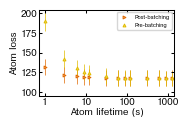

In [11]:
fig, ax = plt.subplots() 
ax.set_ylabel("Atom loss")
ax.set_xlabel("Atom lifetime (s)")
xvals = [math.log(x,10) for x in [1,3,6,9,12,30,60,90,120,300,600, 900, 1200]]

prod_plot.production_quality_scatter(fig, ax, [xvals, xvals], [[x[0] for x in data_batched], [x[0] for x in data_non_batched]],y_decimal=2 ,yerr_list=[[x[1] for x in data_batched], [x[1] for x in data_non_batched]],markers=mark(["rrcbatch", "rrccpu"]),palette=pal(["rrcbatch", "rrccpu"]),  save_path=str(project_dir) + "/atom-loss-1200-abs.pdf")
ax.legend(["Post-batching", "Pre-batching"] ,fontsize=4)
yticks(ax,[100, 125, 150,175, 200])
xticks(ax,[0,1,2,3])
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.savefig("atom-loss-abs.pdf", format='pdf')
plt.show()

